In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [22]:
MAIN_PATH = '/kaggle/input/titanic/'
train_df = pd.read_csv(MAIN_PATH + 'train.csv')
test_df = pd.read_csv(MAIN_PATH + 'test.csv')
sub = pd.read_csv(MAIN_PATH + 'gender_submission.csv')

print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")
print(train_df.head())

Train shape: (891, 12)
Test shape: (418, 11)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0  

Pclass = Ticket Class

SibSp = # of siblings / spouses aboard the Titanic

Parch = # of parents / children aboard the Titanic

Ticket = Ticket number

Fare = Passenger fare

Cabin = Cabin number

Embarked = Port of Embarkation

In [19]:
print(f"Train_df columns:")
print(train_df.columns)
print(f"Test_df columns:")
print(test_df.columns)

Train_df columns:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Test_df columns:
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [20]:
print(f"NaN values in train_df:")
print(train_df.isnull().sum().sort_values(ascending=False))

NaN values in train_df:
Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64


In [21]:
print(f"NaN values in test_df:")
print(test_df.isnull().sum().sort_values(ascending=False))

NaN values in test_df
Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64


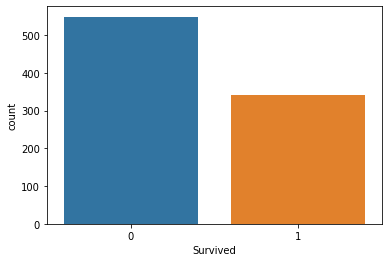

In [24]:
sns.countplot(train_df['Survived'])

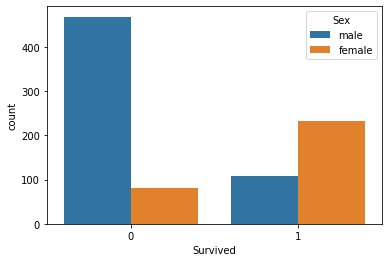

In [36]:
category = train_df.columns
sns.countplot(x='Survived', hue='Sex', data=train_df)

In [37]:
from sklearn.linear_model import LogisticRegression

train_X = pd.get_dummies(train_df['Sex'])
train_Y = train_df['Survived']
LR = LogisticRegression()
LR.fit(train_X, train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
test_X = pd.get_dummies(test_df['Sex'])
test_df['Survived'] = LR.predict(test_X)

In [42]:
test_df[['PassengerId', 'Survived']].to_csv('titanic_submission.csv', index=False)